### 데이터 준비 및 나누기

In [1]:
# 타이타닉 데이터 csv 파일 읽어오기
# 판다스 df 활용, seaborn으로 뭔가 그릴 거임
import pandas as pd
import seaborn as sns

# train = pd.read_csv("data/train_titanic.csv")
# 가 아니었네

df = sns.load_dataset('titanic')
df.head()

# 아주 신기함 -- sns.load_dataset(): 데이터 호출 함수. titanic 데이터는 기본 제공하는 데이터라고 함. 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
# .drop 활용

rdf = df.drop(['deck', 'embark_town'], axis = 1)
# axis = 0: 행 방향 동작, axis = 1: 열 방향 동작 | 여기서는 열 삭제.

rdf.columns.values
# .values: 데이터 뽑아봄

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [4]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
# .dropna 활용

rdf = rdf.dropna(subset=['age'], how='any', axis=0) # 행 방향으로 훑겠다. 여기서는 행 삭제.
print(len(rdf))

714


In [5]:
rdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


In [6]:
# embarked 열의 NaN값을 승선 도시 중에서 가장 많이 출현한 값으로 치환하기 
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
# .value_counts()/value_counts(dropna=True): 고윳값 개수 반환
# .idxmax()/.idxmin(): 최대 최솟값에 해당하는 인덱스 반환

rdf['embarked'].fillna(most_freq, inplace=True)
# inplace=True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다

In [7]:
rdf.describe(include = 'all')
# 입력인수로 include='all'을 넣어주면 문자열 데이터가 있는 열에 대한 추가정보를 제공, 숫자형 열에 대해서는 NaN이라고 함.
# 고유값 개수(unique), 최빈값(top), 빈도수(freq) 등

# 그럼 가장 많이 승선한 도시는 S인 걸 알 수 있음

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,714,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,556,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 분석에 활용할 열(속성)을 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
# 더미 변수: 어떤 속성이 존재할 경우 그 값을 1로, 존재하지 않을 경우 그 값을 0으로 코딩한 인위적 변수
# .get_dummies(): 더미변수 만들어주는 함수

# onehot_sex = pd.get_dummies(['sex'])
# ndf = pd.concat([ndf, onehot_sex], axis = 1)

# onehot_embarked = pd.get_dummies(['embarked'], prefix='town')
# ndf = pd.concat([ndf, onehot_embarked], axis = 1)

# # 더미함수로 변환한 열들을 ndf에 합쳤기 때문에, 기존의 'sex' 칼럼과 'embarked' 칼럼은 버림
# ndf.drop(['sex', 'embarked'], axis = 1, inplace = True)
# ndf.head()

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [11]:
# 속성(변수) 선택.
# 독립 변수, 종속 변수 지정

data = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
    'town_C', 'town_Q', 'town_S']]
target = ndf['survived']

In [12]:
# train 데이터와 test 데이터 나눠줌
# 임포트할 거 임포트

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size = 0.2, random_state = 42)

### Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
# 최소 불순도 차이 이렇게 임의로 지정

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [17]:
# 가장 좋은 성능 내는 모델 찾기
dt = gs.best_estimator_

# 점수 확인
dt.score(X_train, y_train)

0.9422066549912435

In [18]:
# 가장 좋은 성능 내는 파라미터 조합 찾기
gs.best_params_

{'min_impurity_decrease': 0.0005}

#### 각 매개변수에서 수행한 교차 검증의 평균 점수 확인

In [20]:
# 교차검증을 하면 모델들이 각각 점수를 내줌. 그거의 평균을 구한단 소리
# .cv_results_로 확인

gs.cv_results_['mean_test_score']

array([0.80039664, 0.80564455, 0.80213577, 0.8038749 , 0.81266209])

#### 평균 점수에서 가장 큰 값 구하기
- gs.best_params_ 값과 동일함

In [21]:
import numpy as np

# 파라미터에서 가장 큰 값 구함. 변수 지정해서 그걸 파라미터 칼럼에서 찾는 인덱스로
best_index = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_index]

{'min_impurity_decrease': 0.0005}

### DT(2)

In [22]:
# 파라미터에 max_depth, min_impurity_decrease, min_samples_split 각각 7, 0.0005, 2로(리스트로) 넣어줌
params = {'max_depth': [7], 
         'min_impurity_decrease': [0.0005],
         'min_samples_split': [2]}

In [23]:
# 의사결정나무 classifier, gridsearch cv 활용할 거
# 의사결정나무에는 random_state=42 지정, params 주기, 모든 cpu 활용
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

# X_train, y_train 학습시킴
gs_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [7], 'min_impurity_decrease': [0.0005],
                         'min_samples_split': [2]})

In [30]:
X_test

,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
149,2,42.0,0,0,0,1,0,0,1
407,2,3.0,1,1,0,1,0,0,1
53,2,29.0,1,0,1,0,0,0,1
369,1,24.0,0,0,1,0,1,0,0
818,3,43.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
819,3,10.0,3,2,0,1,0,0,1
164,3,1.0,4,1,0,1,0,0,1
363,3,35.0,0,0,0,1,0,0,1
56,2,21.0,0,0,1,0,0,0,1


In [25]:
# test 데이터 예측해봄
y_hat = gs_dt.predict(X_test)
y_hat
# 위에서 뭘 예측한 걸까?

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
# '예측:' '실제:' 프린트해서 예측값, 실제값 뽑아봄. 각각 30개까지만
print('예측:', y_hat[:30])
print('실제:', y_test.values[:30])

예측: [0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0]
실제: [0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0]


In [33]:
# 교차검증 평균점수에서 가장 큰 값 뽑아보기
np.max(gs_dt.cv_results_['mean_test_score'])

0.8178794813119756

#### 훈련된 모델을 이용하여 분류모델 평가지표 확인

In [35]:
# 모형 성능 평가 - Confusion Matrix 계산
# metrics라는 거 임포트해서 활용
from sklearn import metrics

gs_dt_matrix = metrics.confusion_matrix(y_test, y_hat)
print(len(X_test))
print(gs_dt_matrix)

143
[[68 19]
 [17 39]]


In [39]:
# 혼동 행렬 4개 항목을 변수로 놓고 .confusion_matrix에 y_test, y_hat 변수 전달
# .ravel(): 다차원 배열을 1차원 배열로 바꾸는(풀어주는) 함수
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_hat).ravel()
print(TN, FP, FN, TP)

68 19 17 39


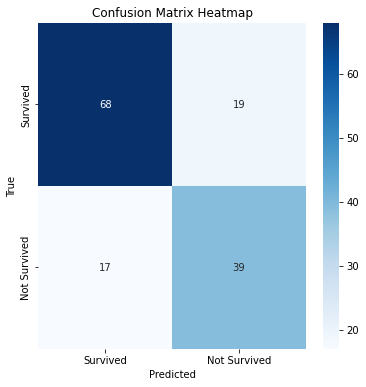

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 테스트 데이터로 모델의 예측값을 얻음
y_pred = gs_dt.predict(X_test)

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 설정 (0: 생존하지 않은 경우, 1: 생존한 경우)
class_labels = ['Survived', 'Not Survived']

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [44]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춘 것
# 변수 = 맞은거 두 항목 / 전체 항목
# 괄호를 씌워줘야 되나 봄
accuracy = (TN + TP) / (TN+TP+FN+FP)
print('정확도(accuracy):', accuracy)

정확도(accuracy): 0.7482517482517482


In [45]:
# "양성으로 예측"한 것 중 "실제 양성"인 것 - 정밀도
# 변수 뽑아보기
precision = TP / (TP+FP)
print('정밀도(precision):', precision)

정밀도(precision): 0.6724137931034483


In [47]:
# 특이도 - 질병) 거짓 양성과 참 음성으로 분류된 개체 중 참 음성 분류된 비율, 실제 음성(negative)값이 정확히 예측되어야 하는 수준
specificity = TN / (TN+FP)
print('특이도(specificity):', specificity)

특이도(specificity): 0.7816091954022989


In [49]:
# "실제 양성"인데 "예측을 양성"이라고 한 것,실제 양성(positive)값이 정확히 예측되어야 하는 수준
sensitivity = TP / (TP+FN)
print('민감도(재현율, Recall, Sensitivity):', sensitivity)

민감도(재현율, Recall, Sensitivity): 0.6964285714285714


In [48]:
# NPV - "음성으로 예측"한 것들 중 "실제 음성"인 것
NPV = TN / (TN+FN)
print('음성 예측 가치(NPV):', NPV)

음성 예측 가치(NPV): 0.8


In [51]:
# 조화 평균(정밀도와 민감도를 이용한 점수)
# 분모가 다를 때 조화평균 사용
f1_score = 2*((precision*sensitivity)/(precision+sensitivity))
print('조화평균(f1_score):',f1_score)

조화평균(f1_score): 0.6842105263157895


In [53]:
# 모형 성능 평가 - 평가지표 계산
# .classification_report 활용
gs_dt_report = metrics.classification_report(y_test, y_hat)
print(gs_dt_report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



In [55]:
# 테스트 데이터 모델 점수 계산(정확도)
gs_dt.score(X_test, y_test)

0.7482517482517482

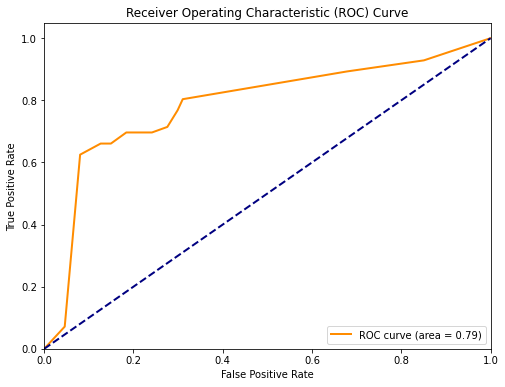

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# test data의 예측 확률을 얻음
# .predict_proba() 활용. 요거는 어떤 클래스에 속할지 그 확률 찾아줌 (0 클래스에 속할 거냐 1 클래스에 속할 거냐)
# 클래스 1 (생존)에 대한 예측 확률
y_prob = gs_dt.predict_proba(X_test)[:, 1]

# ROC 커브 생성
# ROC 커브: FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)가 어떻게 변하는지를 나타내는 곡선
# 가운데 직선(기울기 1)에 곡선이 가까울수록 성능이 떨어지는 거, 멀어질수록 성능이 뛰어난 것
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# 아마도 아래와 같을듯
# fpr : fpr 값을 array로 반환
# tpr : tpr 값을 array로 반환
# thresholds : threshold 값 array

# AUC 계산
# ROC 곡선 및 면적. 일반적으로 1에 가까울수록 좋음. FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있는지가 관건. 
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0]) # xlim(): x축이 표시되는 범위 지정 및 반환
plt.ylim([0.0, 1.05]) # ylim(): y축이 표시되는 범위 지정 및 반환
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

로지스틱 회귀 (C, penalty, max_iter, solver) 등    
결정트리 분류 (max_depth, min_samples_split, max_features) 등

### 로지스틱 회귀

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 파라미터에 "C"랑 'max_iter' 넣음.. 왠지는 잘 모르겟음
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000]
}
# 'max_iter = ' Gradient Descent 방식으로 최적의 해를 구하는 하이퍼 파라미터로 일정 수준이상이 되면 수렴되어 더이상 오르지 않는다 - 더 이상 반복하지 않음

# 로지스틱 회귀 쓸 거고 그걸 그리드서치를 한 번 더 해줌
# 그다음 거기다 트레인데이터 학습시킴
gs_lr = GridSearchCV(LogisticRegression(),params, cv=5)
# cv: 교차검증의 fold 횟수. 여기서는 5 fold 한다는 것.
gs_lr.fit(X_train, y_train)

C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000]})

In [58]:
# 최적의 모델 찾기
lr = gs_lr.best_estimator_
# train 데이터 정확도 뽑아보기
lr.score(X_train, y_train)

0.8178633975481612

In [62]:
# 가장 좋은 파라미터 조합 찾기
gs_lr.best_params_
# C는 정규화(regularization) 강도 결정하는 파라미터. 값이 0에 가까울수록 정규화가 강화됨.

{'C': 0.1, 'max_iter': 100}

In [64]:
# 교차검증 평균점수 최댓값 찾기
# np 활용
np.max(gs_lr.cv_results_['mean_test_score'])

0.8161708619374524